In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


In [2]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')


In [5]:
df_train.shape

(32769, 10)

In [6]:
df_test.shape

(58921, 10)

In [7]:
df_train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [8]:
df_test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [9]:
y_train = df_train['ACTION'].copy(deep=True)


In [10]:
df_train.columns

Index(['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')

In [11]:
features = ['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE']
X_train = df_train[features].copy(deep=True)

id_column = df_test['id'].copy(deep=True)
X_test = df_test[features].copy(deep=True)

In [13]:
X_train.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [14]:
X_test.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [15]:
y_train

0        1
1        1
2        1
3        1
4        1
        ..
32764    1
32765    1
32766    1
32767    1
32768    1
Name: ACTION, Length: 32769, dtype: int64

In [16]:
id_column

0            1
1            2
2            3
3            4
4            5
         ...  
58916    58917
58917    58918
58918    58919
58919    58920
58920    58921
Name: id, Length: 58921, dtype: int64

In [17]:
X_train.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [18]:
X_test.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [19]:
X_train.isnull().sum()

RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [21]:
X_train.isnull().sum()

RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [23]:
df = X_train
print('\nColumns:\n',df.columns)
print('\nData types:\n',df.dtypes)
print('\nSize:\n',df.size)
print('\nShape:\n',df.shape)
print('\nHead(5):\n',df.head())
print('\nTail(5):\n',df.tail())
print('\nNull checks:\n',df.isnull().sum())
print('\nDescribe:\n',df.describe().T)



Columns:
 Index(['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME',
       'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE'],
      dtype='object')

Data types:
 RESOURCE            int64
MGR_ID              int64
ROLE_ROLLUP_1       int64
ROLE_ROLLUP_2       int64
ROLE_DEPTNAME       int64
ROLE_TITLE          int64
ROLE_FAMILY_DESC    int64
ROLE_FAMILY         int64
ROLE_CODE           int64
dtype: object

Size:
 294921

Shape:
 (32769, 9)

Head(5):
    RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  ROLE_TITLE  \
0     39353   85475         117961         118300         123472      117905   
1     17183    1540         117961         118343         123125      118536   
2     36724   14457         118219         118220         117884      117879   
3     36135    5396         117961         118343         119993      118321   
4     42680    5905         117929         117930         119569      119323   

   ROLE_FAMILY_DESC  ROLE_FA

In [24]:
df = X_test
print('\nColumns:\n',df.columns)
print('\nData types:\n',df.dtypes)
print('\nSize:\n',df.size)
print('\nShape:\n',df.shape)
print('\nHead(5):\n',df.head())
print('\nTail(5):\n',df.tail())
print('\nNull checks:\n',df.isnull().sum())
print('\nDescribe:\n',df.describe().T)



Columns:
 Index(['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME',
       'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE'],
      dtype='object')

Data types:
 RESOURCE            int64
MGR_ID              int64
ROLE_ROLLUP_1       int64
ROLE_ROLLUP_2       int64
ROLE_DEPTNAME       int64
ROLE_TITLE          int64
ROLE_FAMILY_DESC    int64
ROLE_FAMILY         int64
ROLE_CODE           int64
dtype: object

Size:
 530289

Shape:
 (58921, 9)

Head(5):
    RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  ROLE_TITLE  \
0     78766   72734         118079         118080         117878      117879   
1     40644    4378         117961         118327         118507      118863   
2     75443    2395         117961         118300         119488      118172   
3     43219   19986         117961         118225         118403      120773   
4     42093   50015         117961         118343         119598      118422   

   ROLE_FAMILY_DESC  ROLE_FA

In [30]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
RESOURCE,32769.0,42923.916171,34173.892702,0.0,20299.0,35376.0,74189.0,312153.0
MGR_ID,32769.0,25988.957979,35928.031650,25.0,4566.0,13545.0,42034.0,311696.0
ROLE_ROLLUP_1,32769.0,116952.627788,10875.563591,4292.0,117961.0,117961.0,117961.0,311178.0
ROLE_ROLLUP_2,32769.0,118301.823156,4551.588572,23779.0,118102.0,118300.0,118386.0,286791.0
ROLE_DEPTNAME,32769.0,118912.779914,18961.322917,4674.0,118395.0,118921.0,120535.0,286792.0
ROLE_TITLE,32769.0,125916.152644,31036.465825,117879.0,118274.0,118568.0,120006.0,311867.0
ROLE_FAMILY_DESC,32769.0,170178.369648,69509.462130,4673.0,117906.0,128696.0,235280.0,311867.0
ROLE_FAMILY,32769.0,183703.408893,100488.407413,3130.0,118363.0,119006.0,290919.0,308574.0
ROLE_CODE,32769.0,119789.430132,5784.275516,117880.0,118232.0,118570.0,119348.0,270691.0


In [31]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
RESOURCE,58921.0,39383.739482,33717.397122,0.0,18418.0,33248.0,45481.0,312136.0
MGR_ID,58921.0,26691.645050,35110.244281,25.0,4663.0,14789.0,46512.0,311779.0
ROLE_ROLLUP_1,58921.0,117028.638041,10805.446548,4292.0,117961.0,117961.0,117961.0,311178.0
ROLE_ROLLUP_2,58921.0,118316.334091,4284.678750,23779.0,118096.0,118300.0,118386.0,194897.0
ROLE_DEPTNAME,58921.0,118858.006721,17916.179109,4674.0,118378.0,118910.0,120410.0,277693.0
ROLE_TITLE,58921.0,126358.019993,32068.294507,117879.0,118259.0,118636.0,120006.0,311867.0
ROLE_FAMILY_DESC,58921.0,170455.861425,69684.692799,4673.0,117913.0,129282.0,234813.0,311867.0
ROLE_FAMILY,58921.0,179278.058960,99639.965300,3130.0,118331.0,118704.0,290919.0,308574.0
ROLE_CODE,58921.0,119707.754264,5326.979178,117880.0,118055.0,118570.0,119353.0,270691.0


In [32]:
df_train.corr()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
ACTION,1.000000,0.000185,-0.005167,-0.013702,0.005179,0.001025,-0.010169,0.003565,0.000502,0.017147
RESOURCE,0.000185,1.000000,0.011088,-0.005016,0.013438,0.030004,0.002936,0.021029,0.031060,0.007733
MGR_ID,-0.005167,0.011088,1.000000,-0.007132,-0.000364,-0.009551,0.017864,-0.018488,-0.118254,-0.004067
ROLE_ROLLUP_1,-0.013702,-0.005016,-0.007132,1.000000,0.033358,-0.009548,0.010207,-0.007546,0.029468,-0.024927
ROLE_ROLLUP_2,0.005179,0.013438,-0.000364,0.033358,1.000000,-0.006056,0.008305,0.018873,0.069558,0.015117
ROLE_DEPTNAME,0.001025,0.030004,-0.009551,-0.009548,-0.006056,1.000000,-0.006932,-0.002877,0.031669,0.010319
ROLE_TITLE,-0.010169,0.002936,0.017864,0.010207,0.008305,-0.006932,1.000000,0.170692,-0.012450,0.155920
ROLE_FAMILY_DESC,0.003565,0.021029,-0.018488,-0.007546,0.018873,-0.002877,0.170692,1.000000,-0.180596,0.092980
ROLE_FAMILY,0.000502,0.031060,-0.118254,0.029468,0.069558,0.031669,-0.012450,-0.180596,1.000000,-0.148625
ROLE_CODE,0.017147,0.007733,-0.004067,-0.024927,0.015117,0.010319,0.155920,0.092980,-0.148625,1.000000


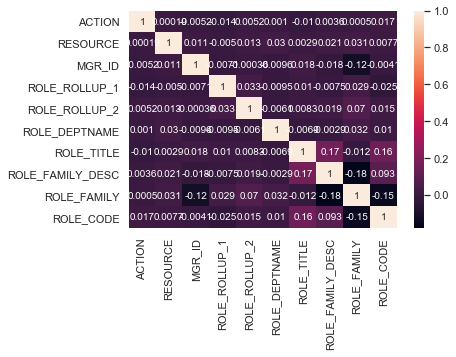

In [33]:
sns.heatmap(df_train.corr(), annot=True)

In [34]:
X_train

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325
...,...,...,...,...,...,...,...,...,...
32764,23497,16971,117961,118300,119993,118321,240983,290919,118322
32765,25139,311198,91261,118026,122392,121143,173805,249618,121145
32766,34924,28805,117961,118327,120299,124922,152038,118612,124924
32767,80574,55643,118256,118257,117945,280788,280788,292795,119082


In [35]:
X_test

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,42093,50015,117961,118343,119598,118422,300136,118424,118425
...,...,...,...,...,...,...,...,...,...
58916,75078,4565,117961,118386,121961,118784,117906,290919,118786
58917,6977,72209,117961,118225,124948,118054,118054,117887,118055
58918,39262,6114,117961,118343,6104,118278,118260,290919,118279
58919,1023,8674,117961,118327,120318,118321,117906,290919,118322


In [36]:
df_train

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
...,...,...,...,...,...,...,...,...,...,...
32764,1,23497,16971,117961,118300,119993,118321,240983,290919,118322
32765,1,25139,311198,91261,118026,122392,121143,173805,249618,121145
32766,1,34924,28805,117961,118327,120299,124922,152038,118612,124924
32767,1,80574,55643,118256,118257,117945,280788,280788,292795,119082


In [40]:
sns.swarmplot(x = 'RESOURCE', y = 'ACTION', data = df_train)

KeyboardInterrupt: 

In [39]:
y_train.value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

In [41]:
X_train.nunique()

RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [42]:
X_test.nunique()

RESOURCE            4971
MGR_ID              4689
ROLE_ROLLUP_1        126
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        466
ROLE_TITLE           351
ROLE_FAMILY_DESC    2749
ROLE_FAMILY           68
ROLE_CODE            351
dtype: int64

In [43]:
from sklearn.naive_bayes import GaussianNB  #, BernoulliNB, MultinomialNB

model = GaussianNB() # Features are Normal, Continuous
# model = BernoulliNB(binarize=0.0) # Features are two values - 0 or 1
# model = MultinomialNB() # Features - Discrete or Categorical or frequencies


In [44]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
y_test_predict = model.predict(X_test)
# y_train_predict = model.predict(X_train)


In [48]:
df = pd.concat([pd.DataFrame(id_column),pd.DataFrame(y_test_predict)], axis=1, ignore_index=True)
df.columns = ['Id','Action']

In [49]:
df

,Id,Action
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
58916,58917,1
58917,58918,1
58918,58919,1
58919,58920,1


In [50]:
print('Training Score: ', model.score(X_train, y_train))
# print('Testing Score: ', model.score(X_test, y_test))

# from sklearn.metrics import accuracy_score
# print('Accuracy: ',accuracy_score(y_test, y_test_predict))


Training Score:  0.9106777747261131


In [51]:
df.to_csv('GaussianNB.csv')

In [60]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

model = DecisionTreeClassifier(criterion="entropy", splitter="random")

model.fit(X_train, y_train)

y_test_predict = model.predict(X_test)

df = pd.concat([pd.DataFrame(id_column),pd.DataFrame(y_test_predict)], axis=1, ignore_index=True)
df.columns = ['Id','Action']

df.to_csv('DecisionTree.csv')